In [1]:
import pickle
from finite.streaming import FIGNAME

with open(f"results/{FIGNAME}.pkl", "rb") as f:
    algos = pickle.load(f)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
Unif, LF, LFavg, EF = r"Uniform policy ($\pi_{\mathrm{unif}}$)", "LF-PGS", "LF-PGS-avg", r"$\mathbf{EpiRC\operatorname{-}PGS\;(Ours)}$"

linestyle = {Unif: '--', LF: ':', LFavg: '-', EF: '-'} 
marker = {Unif: 'P', LF: 'X', LFavg: '*', EF: 'o'}
alphas = {Unif: 1.0, LF: 0.6, LFavg: 1.0, EF: 1.0} 
colors = {Unif: "C0", LF: "C1", LFavg: "C2", EF: "C4"} 

performance_label = r"Objective Return"
violation_label = r"Constraint Violation"
iteration_label = r"Outer Iteration $k$"

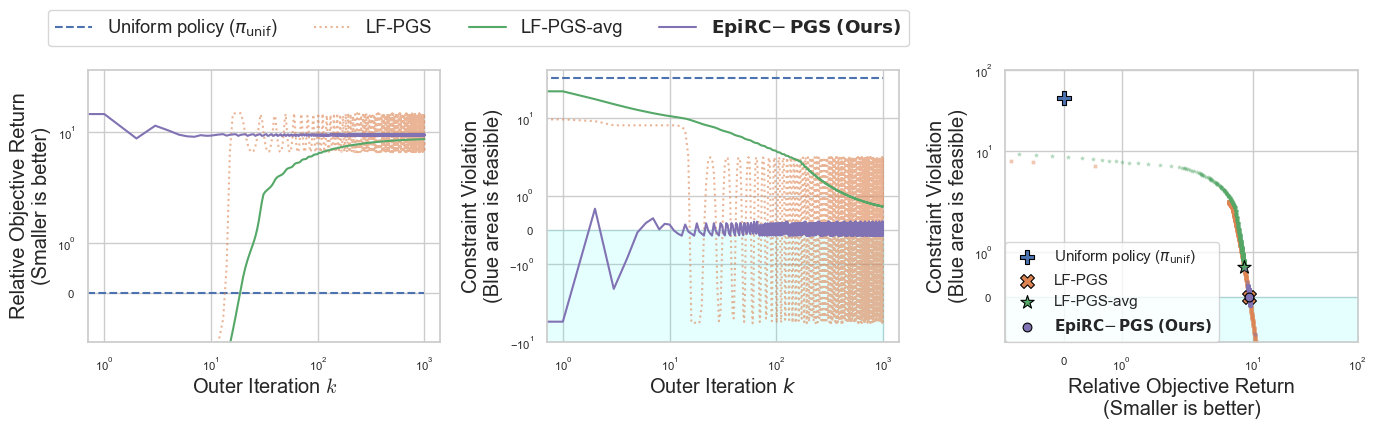

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import pandas as pd


fig = plt.figure(figsize=(14, 4))
sns.set_theme(font_scale=1.2)
axes = []
ticksize = 8


# plot objective return vs violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(133)
    ax.fill_between(x=[-100, 100], y1=-100, y2=0, color="cyan", alpha=0.1)
    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.scatter(J, v, marker=marker[name], s=5, color=colors[name], alpha=0.3)

        # if a feasible policy exist, emphasize the best policy
        if np.sum(v <= 0) > 0:  
            vio_J = np.where(v <= 0, J, np.infty)
            best_idx = np.argmin(vio_J)
        else:
            best_idx = np.argmin(v)

        if name == EF:
            plt.scatter(J[best_idx], v[best_idx], marker=marker[name], color=colors[name], label=name, s=40, edgecolors="black", linewidths=0.8)
        else:
            plt.scatter(J[best_idx], v[best_idx], marker=marker[name], color=colors[name], label=name, s=100, edgecolors="black", linewidths=0.8)

    plt.xscale("symlog")
    plt.yscale("symlog")
    plt.ylim(-1, 100)
    plt.xlim(-1, 100)
    plt.ylabel("Constraint Violation" "\n" r"(Blue area is feasible)")
    plt.xlabel("Relative Objective Return" "\n" "(Smaller is better)")
    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    plt.legend(loc='lower left', borderaxespad=0, fontsize=11)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    fig.tight_layout()


# plot violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(132)
    ax.fill_between(x=[-1, 1000], y1=-10, y2=0, color="cyan", alpha=0.1)
    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        df = pd.DataFrame({violation_label: v, iteration_label: np.arange(len(v))})
        plt.plot(np.arange(len(v)), v,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name])
    plt.xscale("log")
    plt.yscale("symlog")
    plt.ylim(-10, 60)
    plt.ylabel("Constraint Violation" "\n" r"(Blue area is feasible)")
    plt.rcParams["mathtext.fontset"] = 'cm'
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    fig.tight_layout()


# plot objective return
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(131)

    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(J)), J,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name])
    plt.ylim(-1, 50)
    plt.xscale("log")
    plt.yscale("symlog")
    plt.ylabel("Relative Objective Return" "\n" "(Smaller is better)")
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)



with sns.axes_style("whitegrid"):
    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    algo_names = list(algos.keys())
    handles = [None] * len(algo_names)
    handle, label = ax.get_legend_handles_labels()
    for h, name in zip(handle, label):
        handles[algo_names.index(name)] = h

    lgd = fig.legend(handles, algo_names, loc="upper center", bbox_to_anchor=(0.35, 1.1), ncol=len(algo_names))
    fig.tight_layout()

    plt.savefig(f"results/{FIGNAME}.pdf", bbox_extra_artists=(lgd, ), bbox_inches="tight")
    plt.savefig(f"results/{FIGNAME}.png", bbox_extra_artists=(lgd, ), bbox_inches="tight")